# GOLD Price Analysis 
Timeframe 2013-2023

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('gold.csv')

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5703 entries, 0 to 5702
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      5703 non-null   datetime64[ns]
 1   Open      5703 non-null   float64       
 2   High      5703 non-null   float64       
 3   Low       5703 non-null   float64       
 4   Close     5703 non-null   float64       
 5   Volume    5703 non-null   int64         
 6   Currency  5703 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 312.0+ KB


In [4]:
df['Date'] = pd.to_datetime(df['Date'])

Text(0, 0.5, 'Gold Price in USD')

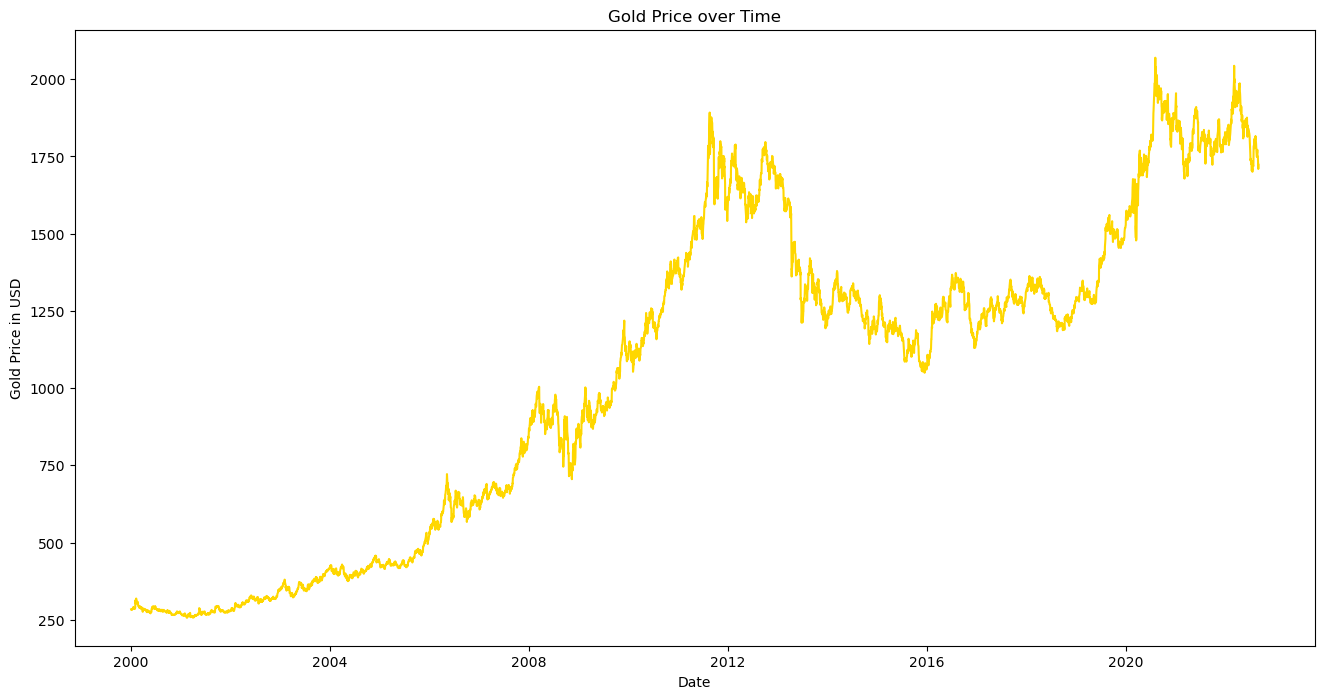

In [78]:
plt.figure(figsize=(16,8))
sns.lineplot(data=df,x='Date',y='Close',color='gold')
plt.title("Gold Price over Time")
plt.ylabel("Gold Price in USD")

In [24]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
fig = make_subplots(rows=4, cols=1, shared_xaxes=True, subplot_titles=("Open","High","Low","Close"))
                    

fig.add_trace(
    go.Scatter(x=df['Date'], y=df['Open'], mode='lines', line=dict(color='gold')),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=df['Date'], y=df['High'], mode='lines', line=dict(color='gold')),
    row=2, col=1
)

fig.add_trace(
    go.Scatter(x=df['Date'], y=df['Low'], mode='lines', line=dict(color='gold')),
    row=3, col=1
)

fig.add_trace(
    go.Scatter(x=df['Date'], y=df['Close'], mode='lines', line=dict(color='gold')),
    row=4, col=1
)

fig.update_layout(
    title="Gold Price(USD) Over Time",
    height=1200,  # Adjust figure height
    showlegend=False,  # Hide redundant legends
    template="plotly_white"
)

# Show plot
fig.show()

In [29]:
df['Daily_returns'] = df['Close'].pct_change(periods=1)*100
df['Weekly_returns'] = df['Close'].pct_change(periods=5)*100
df['Monthly_returns'] = df['Close'].pct_change(periods=21)*100
df['Yearly_returns'] = df['Close'].pct_change(periods=252)*100

Date   Open   High    Low  Close  Volume Currency  Daily_returns  \
0 2000-01-04  289.5  289.5  280.0  283.7   21621      USD            NaN   
1 2000-01-05  283.7  285.0  281.0  282.1   25448      USD      -0.563976   
2 2000-01-06  281.6  282.8  280.2  282.4   19055      USD       0.106345   
3 2000-01-07  282.5  284.5  282.0  282.9   11266      USD       0.177054   
4 2000-01-10  282.4  283.9  281.8  282.7   30603      USD      -0.070696   

   Weekly_returns  Monthly_returns  Yearly_returns  
0             NaN              NaN             NaN  
1             NaN              NaN             NaN  
2             NaN              NaN             NaN  
3             NaN              NaN             NaN  
4             NaN              NaN             NaN

In [31]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Currency',
       'Daily_returns', 'Weekly_returns', 'Monthly_returns', 'Yearly_returns'],
      dtype='object')

# Gold Returns over the period

In [32]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
fig = make_subplots(rows=4, cols=1, shared_xaxes=True, subplot_titles=("Daily Returns","Weekly Returns","Monthly Returns","Yearly Returns"))
                    

fig.add_trace(
    go.Scatter(x=df['Date'], y=df['Daily_returns'], mode='lines'),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=df['Date'], y=df['Weekly_returns'], mode='lines'),
    row=2, col=1
)

fig.add_trace(
    go.Scatter(x=df['Date'], y=df['Monthly_returns'], mode='lines'),
    row=3, col=1
)

fig.add_trace(
    go.Scatter(x=df['Date'], y=df['Yearly_returns'], mode='lines'),
    row=4, col=1
)

fig.update_layout(
    title="Gold Returns Over Period",
    height=1200,  # Adjust figure height
    showlegend=False,  # Hide redundant legends
    template="plotly_white"
)

# Show plot
fig.show()

In [57]:
df['Volatility'] = df['Daily_returns'].rolling(window=21).std() * np.sqrt(252)

In [58]:
df.head()

Date   Open   High    Low  Close  Volume Currency  Daily_returns  \
0 2000-01-04  289.5  289.5  280.0  283.7   21621      USD            NaN   
1 2000-01-05  283.7  285.0  281.0  282.1   25448      USD      -0.563976   
2 2000-01-06  281.6  282.8  280.2  282.4   19055      USD       0.106345   
3 2000-01-07  282.5  284.5  282.0  282.9   11266      USD       0.177054   
4 2000-01-10  282.4  283.9  281.8  282.7   30603      USD      -0.070696   

   Weekly_returns  Monthly_returns  Yearly_returns  Volatility  
0             NaN              NaN             NaN         NaN  
1             NaN              NaN             NaN         NaN  
2             NaN              NaN             NaN         NaN  
3             NaN              NaN             NaN         NaN  
4             NaN              NaN             NaN         NaN

# Volatility Over the period

In [59]:
px.line(x=df['Date'],y=df['Volatility'])

In [ ]:
df['Moving_avg_weekly'] = df['Close'].rolling(window=5).mean()
df['Moving_avg_monthly'] = df['Close'].rolling(window=21).mean()
df['Moving_avg_Yearly'] = df['Close'].rolling(window=252).mean()

In [61]:
df.head()

Date   Open   High    Low  Close  Volume Currency  Daily_returns  \
0 2000-01-04  289.5  289.5  280.0  283.7   21621      USD            NaN   
1 2000-01-05  283.7  285.0  281.0  282.1   25448      USD      -0.563976   
2 2000-01-06  281.6  282.8  280.2  282.4   19055      USD       0.106345   
3 2000-01-07  282.5  284.5  282.0  282.9   11266      USD       0.177054   
4 2000-01-10  282.4  283.9  281.8  282.7   30603      USD      -0.070696   

   Weekly_returns  Monthly_returns  Yearly_returns  Volatility  \
0             NaN              NaN             NaN         NaN   
1             NaN              NaN             NaN         NaN   
2             NaN              NaN             NaN         NaN   
3             NaN              NaN             NaN         NaN   
4             NaN              NaN             NaN         NaN   

   Moving_avg_weekly  Moving_avg_monthly  Moving_avg_Yearly  
0                NaN                 NaN                NaN  
1                NaN                 NaN                NaN  
2                NaN                 NaN                NaN  
3                NaN                 NaN                NaN  
4             282.76                 NaN                NaN

In [73]:

fig = go.Figure()

# Adding traces for each line plot
fig.add_trace(go.Scatter(x=df['Date'], y=df['Close'], mode='lines', name='Daily Price'))

fig.add_trace(go.Scatter(x=df['Date'], y=df['Moving_avg_Yearly'], mode='lines', name='Yearly Rolling Mean'))

# Customize the layout (optional)
fig.update_layout(
    title='Stock Price and Moving Averages',
    xaxis_title='Date',
    yaxis_title='Price',
    height=800,
    template='plotly_white',  # You can change the theme
    legend_title='Legend'
)

# Display the plot
fig.show()


In [74]:
df['50_days_avg_weekly'] = df['Close'].rolling(window=50).mean()
df['100_days_avg_monthly'] = df['Close'].rolling(window=100).mean()
df['200_days_avg_Yearly'] = df['Close'].rolling(window=200).mean()

In [77]:
fig = go.Figure()

# Adding traces for each line plot
fig.add_trace(go.Scatter(x=df['Date'], y=df['Close'], mode='lines', name='Daily Price'))
fig.add_trace(go.Scatter(x=df['Date'], y=df['50_days_avg_weekly'], mode='lines', name='50 Days Moving Average'))
fig.add_trace(go.Scatter(x=df['Date'], y=df['100_days_avg_monthly'], mode='lines', name='100 Days Moving Average'))
fig.add_trace(go.Scatter(x=df['Date'], y=df['200_days_avg_Yearly'], mode='lines', name='200 Days Moving Average'))

# Customize the layout (optional)
fig.update_layout(
    title='Stock Price and Moving Averages',
    xaxis_title='Date',
    yaxis_title='Price',
    height=800,
    template='plotly_white',  # You can change the theme
    legend_title='Legend'
)

# Display the plot
fig.show()

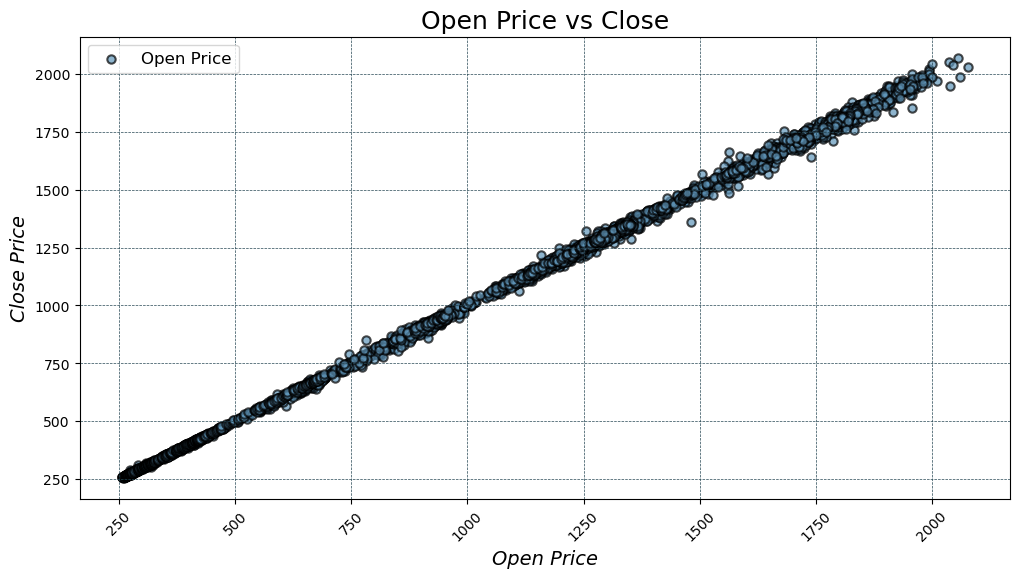

In [79]:
plt.figure(figsize=(12, 6))
plt.scatter(df['Open'], df['Close'], c='#6096ba', alpha=0.7, marker='o', edgecolors='black', linewidth=1.5)
plt.legend(['Open Price'], loc='upper left', fontsize=12)
plt.title('Open Price vs Close', fontsize=18)
plt.xlabel('Open Price', fontsize=14, fontstyle='italic')
plt.ylabel('Close Price', fontsize=14, fontstyle='italic')
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', linewidth=0.5, color='#264653')
plt.show()